In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>''')

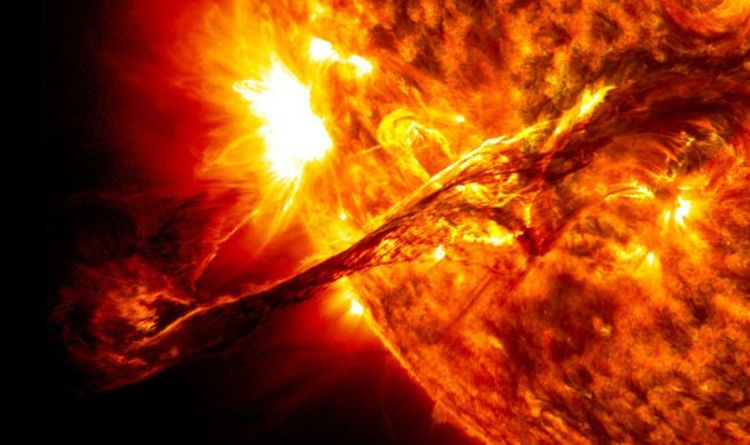
# Staring into the Sun
## Sequence Modeling on Solar Flares
Carpio, Albertyn | MSDS 2021

### Executive Summary
Solar flares are explosions of electromagnetic radiation that happen due entangled electromagnetic fields in our sun reaching a breaking point. Although they are fairly common space weather phenomena, high powered solar flares known as Coronal Mass Ejections (or Solar Super Storms) are capable of crippling civilization by damaging our technological systems.  

That said, improving space weather predictions is key to managing space weather.  Current work uses LSTM to predict solar flares and their classes.  We experiment in using a language modeling technique (embedding--weight tying) for time series modeling. 

In general our experiments show results in the range of $80$%-$91$% accuracy.  While this is better than the raw PCC values, this does not beat the heuristic PCC threshold.  It is also observed that over the course of the epochs, validation loss is increasing, while validation recall is decreasing. The behaviour of validation loss (overfitting) is in part due to the imbalance in the dataset where the non-solar-flare class is dominating.  Possible future experiments would be to (1) change the loss function; and (2) to add dropout layers to increase generalization.  On that note, it can be concluded, that the models are not predicting very well.  Still, over the course of the different experiments, adding embeddings (weight tying) has introduced some improvement to the baseline numbers.  The hypothesis could serve for further experiment with improved methodology.

It is recommended to experiment with adding dropout layers, batch normalization, and other regularization techniques to address the overfitting problem.  Also, other implementations of embedding (i.e. TrellisNet) is intended to be explored.  Another recommendation is to reframe the problem in terms of actually predicting CMEs rather than just solar flares. However, additional data would be needed for the flare classification.  Speaking of data, future work should remove the sampling to maximize the available data.

### Introduction
Our sun is a roiling ball of electrically charged gases. As with the nature of electromagnetism, these currents generate magnetic fields.  Furthermore, the movement of these gases causes said magnetic fields to become so entangled that they need a reset. Such a reset is known as a solar flare, where energy stored in a magnetic knot explodes out. 

Solar flares are not necessarily rare events, but they do have varying strengths. Largely, those that hit the Earth are easily managed by our magnetosphere, with only some auroras to show for it.  However, the same cannot be said the further we go on the solar storm spectrum.  Stronger solar flares--coronal mass ejections (CME) or solar super storms--can have severe consequences for modern civilization

In that solar flares are explosions of electromagnetic radiation, while they do not pose much threat to humans under the protection of the Earth's magnetosphere, our technology is a different matter altogether.  CMEs can result into geomagnetic storms which, at minimum, mess with satellites, or worse damage electrical power systems.  What this means is that, as our reliance on electricity and technology has grown, more dangerous CMEs have the potential to cripple our cities.  Estimated impact in the worst case is up to $2.6 Trillion in the U.S. alone, and with a projected recovery on the scale of months.

In the absence of more permanent precautions, the current best solutions for dealing with solar super storms is for utility companies to manage the flow of power in the event of a CME.  Such a workaround relies on early warnings.  Typically, CMEs travel from the sun on a range of a few days, to half a day.  While the researcher is unaware on the scale of preparation and advance notive needed by utility companies around the world, better space weather forecasting has obvious benefits.  On that note: **What can machine learning do towards forecasting space weather?**



### Methodology
#### Hypothesis
One such research into predicting solar flares uses LSTM to predict solar flares within 24 hours for different solar flare classes(Wang, et al. 2020).  LSTM is a form of machine learning using recurrent neural networks that employs multiple "gates" to determine "useful" and "forgettable" information.  It is commonly used in sequence-based learning, notably in natural language modeling and time-series predictions.  **For this research, we utilize a strategy in language modeling known as weight tying (output embedding), and investigate its effects in comparison to baseline LSTM modeling.**<br><br>

#### Weight Tying
Weight tying is a method of sharing weights between the initial embedding layer that learns vector representations of words, and the output (decoding) layer.  This method has been shown to improve performance--both on a resource level (less parameters), and on a results level (less overfitting, among other benefits).  In this work we treat a time series dataset in a similar fashion, where we introduce embedding and weight tying into the model.<br><br>

#### Data
Our dataset is a multi-variate time series of solar magnetic field observations taken in 12-minute intervals.  This dataset was provided by Kaggle as part of their 2019 BigData Cup Challenge on Flare Prediction. <br><br>

#### Experiments
We have a total of six (6) experiment scenarios, two baseline and four with weight tying:
1. Basic LSTM: Single LSTM layer, with a fully connected output layer to detect solar flares
2. Stacked LSTM: Added a second LSTM layer to Experiment 1, as done by Wang, et al.
3. Basic with embedding: Added an embedding layer before the architecture in Experiment 1, and a decoding layer after the LSTM with shared the weights between the two layers
4. Weight-tied stacked LSTM: Experiment 2 architecture with the weights shared between the two LSTM layers
5. Stacked with embedding: Added an embedding first layer, and a decoding layer after the stacked LSTM layers, with weights shared between the two
6. Weight-tied stacked LSTM with embedding: Similar architecture to Experiment 5, but with the weights shared between the two LSTM layers as well<br><br>

#### Process
The process flow of the methodology was as follows:
1. Download and extract the data from Kaggle: <br>
    The data retrieved from Kaggle was in the form of four JSON files--three training datasets, and one test dataset. In total, the size was over 13GB of data. 
2. Sample the data using PySpark: <br>
    In order for the actual project data to be more manageable, we sampled from each of the three training datasets for our training, validation, and test datasets, respectively.
3. Scaling the data: <br>
    Data was scaled using the mean and standard deviation of the training dataset.
4. Training, evaluation, and logging of the models: <br>
    Experiment results for every run (parameters and metrics) were logged using MLFlow. Chosen metrics were accuracy, loss, and recall

In [1]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "albertyncarpio"
os.environ['KAGGLE_KEY'] = "148f6debd6f02a693e015fc1f81a224a"

In [2]:
!kaggle competitions download -c bigdata2019-flare-prediction

 70% 5.00M/7.12M [00:00<00:00, 21.2MB/s]
100% 7.12M/7.12M [00:00<00:00, 28.2MB/s]
100% 1.42G/1.43G [00:19<00:00, 90.7MB/s]
100% 1.43G/1.43G [00:19<00:00, 78.9MB/s]
  0% 0.00/42.1k [00:00<?, ?B/s]
100% 42.1k/42.1k [00:00<00:00, 40.8MB/s]
  0% 0.00/378k [00:00<?, ?B/s]
100% 378k/378k [00:00<00:00, 112MB/s]
100% 1.20G/1.21G [00:15<00:00, 68.6MB/s]
100% 1.21G/1.21G [00:15<00:00, 82.4MB/s]
100% 433M/434M [00:05<00:00, 50.3MB/s]
100% 434M/434M [00:05<00:00, 76.7MB/s]
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 120MB/s]
100% 2.70G/2.71G [00:40<00:00, 58.7MB/s]
100% 2.71G/2.71G [00:40<00:00, 72.5MB/s]
 26% 5.00M/19.5M [00:00<00:00, 21.8MB/s]
100% 19.5M/19.5M [00:00<00:00, 65.0MB/s]


In [3]:
# !sh
!unzip fold1Training.json.zip
!unzip fold2Training.json.zip
!unzip fold3Training.json.zip
!unzip testSet.json.zip

Archive:  fold1Training.json.zip
  inflating: fold1Training.json      
Archive:  fold2Training.json.zip
  inflating: fold2Training.json      
Archive:  fold3Training.json.zip
  inflating: fold3Training.json      
Archive:  testSet.json.zip
  inflating: testSet.json            


In [5]:
!pip install pyspark --quiet
!pip install mlflow --quiet
!pip install pyngrok --quiet

     |████████████████████████████████| 204.2MB 64kB/s 
     |████████████████████████████████| 204kB 44.4MB/s 
     |████████████████████████████████| 14.2MB 338kB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 348kB 51.0MB/s 
     |████████████████████████████████| 153kB 53.9MB/s 
     |████████████████████████████████| 1.1MB 34.1MB/s 
     |████████████████████████████████| 163kB 52.8MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 133kB 48.2MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 2.6MB 43.2MB/s 
     |████████████████████████████████| 204kB 50.1MB/s 
     |████████████████████████████████| 481kB 45.4MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 


In [6]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
import mlflow

In [7]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, udf, col, lit
from pyspark.sql.types import *

sc = SparkContext()
spark = SparkSession(sc)

In [8]:
f1train2 = spark.read.json('fold1Training.json')

In [12]:
f1train2 = f1train2.repartition(500)

In [14]:
explode_many = udf(lambda *x: list(zip(*x)),
                  ArrayType(StructType([StructField(y, DoubleType())
                  for y in cols])))

In [20]:
sample = f1train2.sample(fraction=0.3)

y_train = sample.select(col('id').alias('labelId'), 'classNum')
x_train = sample.select('id', 'values.*')

df2 = (x_train.join(y_train, x_train.id==y_train.labelId)
              .withColumn("values", explode_many(*cols))
              .withColumn("values", explode("values"))
              .select('id', col('values.*'), 'classNum'))

train = df2.select(*cols, 'classNum').toPandas()
print(train.shape)

In [24]:
sample.groupBy('classNum').count().show()

+--------+-----+
|classNum|count|
+--------+-----+
|       0|19347|
|       1| 3738|
+--------+-----+



In [25]:
f2val = spark.read.json('fold2Training.json')

sample = f2val.sample(fraction=0.1)

y_train = sample.select(col('id').alias('labelId'), 'classNum')
x_train = sample.select('id', 'values.*')

df2 = (x_train.join(y_train, x_train.id==y_train.labelId)
              .withColumn("values", explode_many(*cols))
              .withColumn("values", explode("values"))
              .select('id', col('values.*'), 'classNum'))

val = df2.select(*cols, 'classNum').toPandas()

In [26]:
sample.groupBy('classNum').count().show()

+--------+-----+
|classNum|count|
+--------+-----+
|       0| 7946|
|       1| 1387|
+--------+-----+



In [39]:
f3test = spark.read.json('fold3Training.json')

sample = f3test.sample(fraction=0.05)

y_train = sample.select(col('id').alias('labelId'), 'classNum')
x_train = sample.select('id', 'values.*')

df2 = (x_train.join(y_train, x_train.id==y_train.labelId)
              .withColumn("values", explode_many(*cols))
              .withColumn("values", explode("values"))
              .select('id', col('values.*'), 'classNum'))

test = df2.select(*cols, 'classNum').toPandas()

In [40]:
sample.groupBy('classNum').count().show()

+--------+-----+
|classNum|count|
+--------+-----+
|       0| 1156|
|       1|  212|
+--------+-----+



In [41]:
train = train.dropna()
val = val.dropna()
test = test.dropna()

In [30]:
def generator(data, cols, lookback, delay, min_index, max_index=None,
              shuffle=False, batch_size=128, step=3):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index,
                                     size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices] ### Mean of data
            targets[j] = data[rows[j] + delay][-1]
            
        yield samples, targets

In [42]:
trainX = train[cols]

mean = trainX.mean(axis=0)
trainX -= mean
std = trainX.std(axis=0)
trainX /= std

trainY = tf.reshape(train['classNum'], [-1, 1])
train2 = np.concatenate([trainX, trainY], axis=1)
trainX = tf.reshape(trainX, [-1, 1, 25])

valX = val[cols]

valX -= mean
valX /= std

valY = tf.reshape(val['classNum'], [-1, 1])
val2 = np.concatenate([valX, valY], axis=1)
valX = tf.reshape(valX, [-1, 1, 25])

testX = test[cols]

testX -= mean
testX /= std

testY = tf.reshape(test['classNum'], [-1, 1])
test2 = np.concatenate([testX, testY], axis=1)
testX = tf.reshape(testX, [-1, 1, 25])

### Results

#### PCC
As part of the research is a classification question (solar flare, or no solar flare), we first calculate the Proportion Chance Criterion for each of our datasets.  Our raw PCC values are in the range of $72$%-$74$%, and the heuristic PCC values are in the range of $90$%-$93$%.

##### Training PCC

Population per class:         0
0  345796
1   68555

Proportion Chance Criterion: 72.38453798657247%
1.25 * Proportion Chance Criterion: 90.48067248321559%


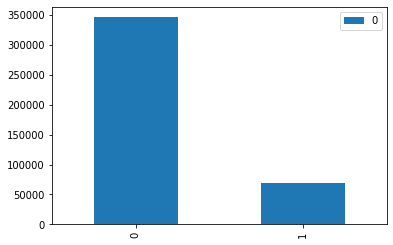

In [51]:
from collections import Counter
state_counts = Counter(train['classNum'].to_numpy())
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion: {}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

<br><br>
##### Validation PCC

Population per class:         0
0  464614
1   82858

Proportion Chance Criterion: 74.3118452373036%
1.25 * Proportion Chance Criterion: 92.8898065466295%


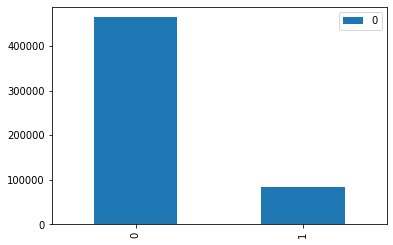

In [52]:
from collections import Counter
state_counts = Counter(val['classNum'].to_numpy())
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion: {}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

<br><br>
##### Test PCC

Population per class:        0
0  69094
1  12680

Proportion Chance Criterion: 73.7965122395879%
1.25 * Proportion Chance Criterion: 92.24564029948488%


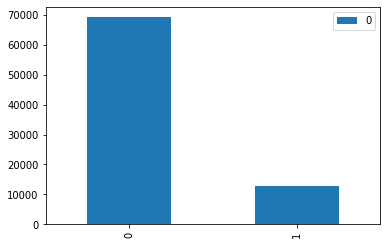

In [53]:
from collections import Counter
state_counts = Counter(test['classNum'].to_numpy())
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion: {}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

<br><br><br>
#### Model Training and Results
In general our experiments show results in the range of $80$%-$91$% accuracy.  While this is better than the raw PCC values, this does not beat the heuristic PCC threshold.  It is also observed that over the course of the epochs, validation loss is increasing, while validation recall is decreasing. The behaviour of validation loss (overfitting) is in part due to the imbalance in the dataset where the non-solar-flare class is dominating.  Possible future experiments would be to (1) change the loss function; and (2) to add dropout layers to increase generalization.  On that note, it can be concluded, that the models are not predicting very well.

In [34]:
# Defining the data generators for the three datasets

lookback = 600  # Past 10 observations
step = 6
delay = 300 # 5 observations onwward
batch_size = 128 

train_gen = generator(train2, cols,
    lookback=lookback,
    delay=delay,
    shuffle=True,
    min_index=0,
    step=step,
    batch_size=batch_size)

val_gen = generator(val2, cols,
    lookback=lookback,
    delay=delay,
    min_index=0,
    step=step,
    batch_size=batch_size)

test_gen = generator(test2, cols,
    lookback=lookback,
    delay=delay,
    min_index=0,
    step=step,
    batch_size=batch_size)

In [37]:
# Experiment parameters

import mlflow
steps = [100, 300, 500]
epochs = [10, 20, 30]
steps_val = [50, 100, 200]
class_weight = [{0: 1., 1: 5.}, {0:1., 1:1.}, {0: 1., 1: 2.}]

In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

##### Experiment 1: Basic LSTM

In [54]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='Basic'):
    model = Sequential()
    model.add(layers.LSTM(32, dropout=0.2,recurrent_dropout=0.2,
                          input_shape=(None, 25)))
    model.add(layers.Dense(1, activation='sigmoid'))
    display(model.summary())
    
    model.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    history = model.fit(trainX, trainY,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=(valX, valY),
                        validation_steps=sv,
                        class_weight=cw
    )
    # history = model.fit(train_gen,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=val_gen,
    #                     validation_steps=sv,
    #                     class_weight=cw
    #                     )
    mlflow.keras.log_model(model, "Basic", save_format='tf')
    mlflow.log_params(history.params)
    scores = model.evaluate(testX, testY)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                7424      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 6s 36ms/step - loss: 0.9360 - accuracy: 0.7481 - recall_7: 0.8266 - val_loss: 0.4364 - val_accuracy: 0.7839 - val_recall_7: 0.8830
Epoch 2/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6610 - accuracy: 0.8039 - recall_7: 0.8540 - val_loss: 0.3983 - val_accuracy: 0.8013 - val_recall_7: 0.8986
Epoch 3/10
100/100 [==============================] - 4s 36ms/step - loss: 0.6198 - accuracy: 0.8156 - recall_7: 0.8731 - val_loss: 0.4040 - val_accuracy: 0.7980 - val_recall_7: 0.9055
Epoch 4/10
100/100 [==============================] - 4s 37ms/step - loss: 0.6082 - accuracy: 0.8154 - recall_7: 0.8826 - val_loss: 0.4017 - val_accuracy: 0.7981 - val_recall_7: 0.9083
Epoch 5/10
100/100 [==============================] - 3s 34ms/step - loss: 0.5990 - accuracy: 0.8166 - recall_7: 0.8857 - val_loss: 0.3979 - val_accuracy: 0.7991 - val_recall_7: 0.9095
Epoch 6/10
100/100 [==============================] - 3s 33ms/step - loss: 

None

Epoch 1/20
300/300 [==============================] - 7s 15ms/step - loss: 0.4290 - accuracy: 0.8239 - recall_8: 0.5946 - val_loss: 0.2491 - val_accuracy: 0.8807 - val_recall_8: 0.5413
Epoch 2/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2635 - accuracy: 0.8752 - recall_8: 0.5065 - val_loss: 0.2490 - val_accuracy: 0.8843 - val_recall_8: 0.5467
Epoch 3/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2578 - accuracy: 0.8795 - recall_8: 0.5211 - val_loss: 0.2485 - val_accuracy: 0.8859 - val_recall_8: 0.5192
Epoch 4/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2515 - accuracy: 0.8819 - recall_8: 0.5273 - val_loss: 0.2502 - val_accuracy: 0.8842 - val_recall_8: 0.5169
Epoch 5/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2478 - accuracy: 0.8852 - recall_8: 0.5388 - val_loss: 0.2505 - val_accuracy: 0.8837 - val_recall_8: 0.5318
Epoch 6/20
300/300 [==============================] - 4s 12ms/step - loss: 

None

Epoch 1/30
500/500 [==============================] - 8s 10ms/step - loss: 0.5073 - accuracy: 0.8230 - recall_9: 0.7515 - val_loss: 0.2831 - val_accuracy: 0.8568 - val_recall_9: 0.7920
Epoch 2/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3798 - accuracy: 0.8623 - recall_9: 0.7444 - val_loss: 0.2819 - val_accuracy: 0.8621 - val_recall_9: 0.7885
Epoch 3/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3728 - accuracy: 0.8660 - recall_9: 0.7480 - val_loss: 0.2834 - val_accuracy: 0.8619 - val_recall_9: 0.7890
Epoch 4/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3653 - accuracy: 0.8692 - recall_9: 0.7554 - val_loss: 0.2834 - val_accuracy: 0.8634 - val_recall_9: 0.7740
Epoch 5/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3608 - accuracy: 0.8708 - recall_9: 0.7539 - val_loss: 0.2857 - val_accuracy: 0.8642 - val_recall_9: 0.7694
Epoch 6/30
500/500 [==============================] - 5s 9ms/step - loss: 0.356

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall is decreasing.

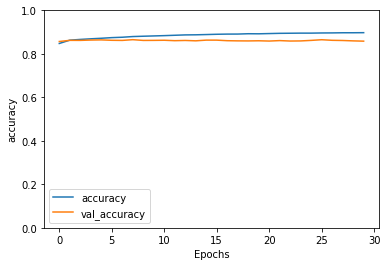

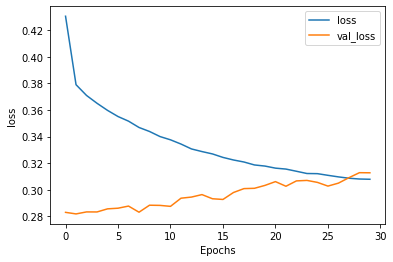

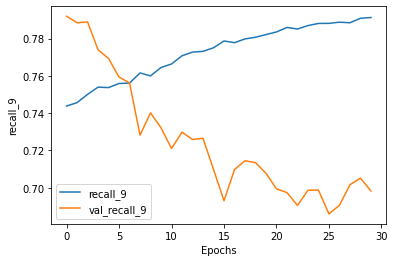

In [55]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  if string=='accuracy':
    plt.ylim([0,1])
  plt.legend([string, 'val_'+string])
  plt.title(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_9")

<br><br>
##### Experiment 2: Stacked LSTM

In [56]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='Stcked LSTM'):
    model2 = Sequential()
    model2.add(layers.LSTM(32, dropout=0.2,recurrent_dropout=0.2,
                          input_shape=(None, 25), return_sequences=True))
    model2.add(layers.LSTM(32, dropout=0.2,recurrent_dropout=0.2,
                          input_shape=(None, 25)))
    model2.add(layers.Dense(1, activation='sigmoid'))
    display(model2.summary())

    model2.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    history = model2.fit(trainX, trainY,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=(valX, valY),
                        validation_steps=sv,
                        class_weight=cw
    )
    # history = model2.fit(train_gen,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=val_gen,
    #                     validation_steps=sv,
    #                     class_weight=cw
    #                     )
    mlflow.keras.log_model(model2, "Stacked LSTM", save_format='tf')
    mlflow.log_params(history.params)
    scores = model2.evaluate(testX, testY)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 32)          7424      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 15,777
Trainable params: 15,777
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
500/500 [==============================] - 15s 20ms/step - loss: 0.7751 - accuracy: 0.7933 - recall_10: 0.8546 - val_loss: 0.4131 - val_accuracy: 0.7924 - val_recall_10: 0.9127
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.6061 - accuracy: 0.8107 - recall_10: 0.8942 - val_loss: 0.4088 - val_accuracy: 0.7922 - val_recall_10: 0.9141
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.5985 - accuracy: 0.8106 - recall_10: 0.8978 - val_loss: 0.3985 - val_accuracy: 0.7945 - val_recall_10: 0.9123
Epoch 4/20
500/500 [==============================] - 9s 17ms/step - loss: 0.5870 - accuracy: 0.8128 - recall_10: 0.8993 - val_loss: 0.4108 - val_accuracy: 0.7879 - val_recall_10: 0.9168
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5796 - accuracy: 0.8145 - recall_10: 0.9034 - val_loss: 0.3933 - val_accuracy: 0.7979 - val_recall_10: 0.9077
Epoch 6/20
500/500 [==============================] - 8s 16ms/st

None

Epoch 1/20
500/500 [==============================] - 15s 18ms/step - loss: 0.7816 - accuracy: 0.7985 - recall_11: 0.8220 - val_loss: 0.4217 - val_accuracy: 0.7896 - val_recall_11: 0.9131
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.6084 - accuracy: 0.8097 - recall_11: 0.8915 - val_loss: 0.4028 - val_accuracy: 0.7913 - val_recall_11: 0.9133
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5987 - accuracy: 0.8122 - recall_11: 0.8972 - val_loss: 0.4074 - val_accuracy: 0.7896 - val_recall_11: 0.9147
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5877 - accuracy: 0.8136 - recall_11: 0.9002 - val_loss: 0.3991 - val_accuracy: 0.7905 - val_recall_11: 0.9150
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5787 - accuracy: 0.8152 - recall_11: 0.9025 - val_loss: 0.4008 - val_accuracy: 0.7946 - val_recall_11: 0.9125
Epoch 6/20
500/500 [==============================] - 8s 16ms/st

None

Epoch 1/20
500/500 [==============================] - 14s 17ms/step - loss: 0.7821 - accuracy: 0.7945 - recall_12: 0.8517 - val_loss: 0.4036 - val_accuracy: 0.7957 - val_recall_12: 0.9094
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.6066 - accuracy: 0.8095 - recall_12: 0.8912 - val_loss: 0.4093 - val_accuracy: 0.7896 - val_recall_12: 0.9160
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.5997 - accuracy: 0.8097 - recall_12: 0.8978 - val_loss: 0.4168 - val_accuracy: 0.7865 - val_recall_12: 0.9184
Epoch 4/20
500/500 [==============================] - 8s 17ms/step - loss: 0.5868 - accuracy: 0.8126 - recall_12: 0.9001 - val_loss: 0.4056 - val_accuracy: 0.7917 - val_recall_12: 0.9147
Epoch 5/20
500/500 [==============================] - 9s 17ms/step - loss: 0.5840 - accuracy: 0.8127 - recall_12: 0.9002 - val_loss: 0.4004 - val_accuracy: 0.7920 - val_recall_12: 0.9150
Epoch 6/20
500/500 [==============================] - 8s 16ms/st

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $80$% and $85$%.  Validation loss is fairly constant, and validation recall is decreasing.

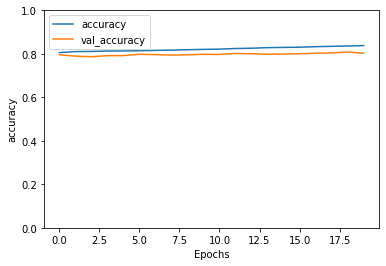

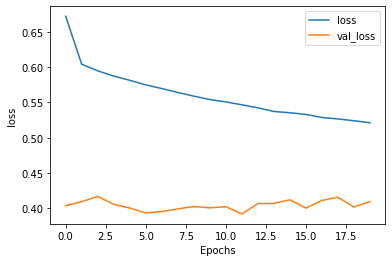

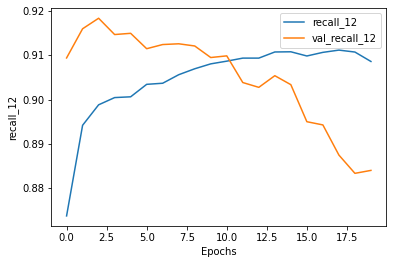

In [57]:
import matplotlib.pyplot as plt

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_12")

In [68]:
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.python.keras import backend as K
from dense_tied import DenseTied
from keras.models import Model
from keras import Input
class TiedtDense(Dense):
    def __init__(self, output_dim, master_layer, **kwargs):
        self.master_layer = master_layer
        super(TiedtDense, self).__init__(output_dim, **kwargs)

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.input_dim = input_dim

        self.kernel = tf.transpose(self.master_layer.kernel)
        self.bias = K.zeros((self.units,))
        self._non_trainable_weights.append(self.kernel)
        self.trainable_weights.append(self.bias)

class TiedtLSTM(LSTM):
    def __init__(self, output_dim, master_layer, **kwargs):
        self.master_layer = master_layer
        super(TiedtLSTM, self).__init__(output_dim, **kwargs)

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.input_dim = input_dim

        self.cell.kernel = tf.transpose(self.master_layer.cell.kernel)
        self.cell.recurrent_kernel = K.transpose(self.master_layer.cell.recurrent_kernel)
        self.bias = K.zeros((self.units,))
        self._non_trainable_weights.append(self.cell.kernel)
        self.trainable_weights.append(self.bias)

<br><br>
##### Experiment 3: Basic with embedding

In [ ]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='WeightTied1'):
    layer1 = layers.Dense(26, activation='relu', input_shape=(None, 26))
    layer2 = TiedtDense(26, layer1, activation='relu')

    model3 = Sequential()
    model3.add(layer1)
    model3.add(layers.LSTM(26, dropout=0.2,recurrent_dropout=0.2,
                        input_shape=(None, 25)))
    model3.add(layer2)
    model3.add(layers.Dense(1, activation='sigmoid'))

    display(model3.summary())

    model3.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    # history = model3.fit(trainX, trainY,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=(valX, valY),
    #                     validation_steps=sv,
    #                     class_weight=cw
    # )
    history = model3.fit(train_gen,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=val_gen,
                        validation_steps=sv,
                        class_weight=cw
                        )
    mlflow.keras.log_model(model3, "WeightTied1", save_format='tf')
    mlflow.log_params(history.params)
    scores = model3.evaluate(test_gen)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, None, 26)          702       
_________________________________________________________________
lstm_44 (LSTM)               (None, 26)                5512      
_________________________________________________________________
tiedt_dense_12 (TiedtDense)  (None, 26)                1404      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 27        
Total params: 6,943
Trainable params: 6,267
Non-trainable params: 676
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 18s 149ms/step - loss: 1.1373 - accuracy: 0.6821 - recall_31: 0.2507 - val_loss: 0.7059 - val_accuracy: 0.4264 - val_recall_31: 0.7046
Epoch 2/10
100/100 [==============================] - 14s 145ms/step - loss: 1.1489 - accuracy: 0.5202 - recall_31: 0.5286 - val_loss: 0.6749 - val_accuracy: 0.6794 - val_recall_31: 0.1099
Epoch 3/10
100/100 [==============================] - 15s 146ms/step - loss: 1.1719 - accuracy: 0.5536 - recall_31: 0.4612 - val_loss: 0.7010 - val_accuracy: 0.4434 - val_recall_31: 0.5307
Epoch 4/10
100/100 [==============================] - 14s 145ms/step - loss: 1.1486 - accuracy: 0.5381 - recall_31: 0.5335 - val_loss: 0.7019 - val_accuracy: 0.5352 - val_recall_31: 0.4910
Epoch 5/10
100/100 [==============================] - 14s 144ms/step - loss: 1.1473 - accuracy: 0.5803 - recall_31: 0.5048 - val_loss: 0.6725 - val_accuracy: 0.5973 - val_recall_31: 0.1806
Epoch 6/10
100/100 [==============================] - 1

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall is decreasing.

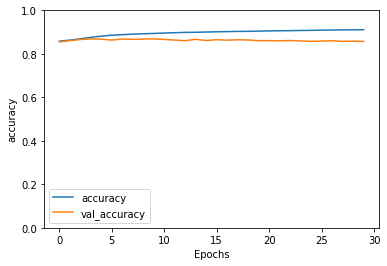

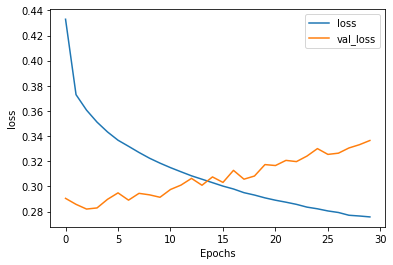

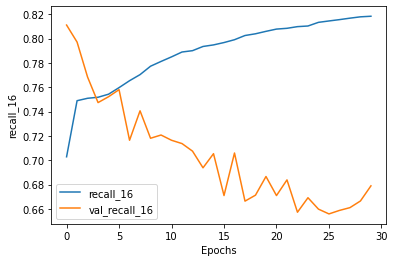

In [63]:
import matplotlib.pyplot as plt

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_16")

In [65]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='WeightTied2'):
    layer1 = layers.Dense(25, activation='relu', name='layer1',
                      input_shape=(None, 25))
    layer2 = DenseTied(25, activation='relu', name='tied1', tied_to = layer1)

    model4 = Sequential()
    model4.add(layer1)
    model4.add(layers.LSTM(25, dropout=0.2,recurrent_dropout=0.2,
                        input_shape=(None, 25)))
    model4.add(layer2)
    model4.add(layers.Dense(1, activation='sigmoid'))

    display(model4.summary())

    model4.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    history = model4.fit(trainX, trainY,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=(valX, valY),
                        validation_steps=sv,
                        # class_weight=cw
    )
    # history = model.fit(train_gen,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=val_gen,
    #                     validation_steps=sv,
    #                     class_weight=cw
    #                     )
    mlflow.keras.log_model(model4, "WeightTied2", save_format='tf')
    mlflow.log_params(history.params)
    scores = model4.evaluate(testX, testY)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, None, 25)          650       
_________________________________________________________________
lstm_18 (LSTM)               (None, 25)                5100      
_________________________________________________________________
tied1 (DenseTied)            (None, 25)                1300      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 26        
Total params: 6,426
Trainable params: 5,801
Non-trainable params: 625
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 8s 40ms/step - loss: 0.6020 - accuracy: 0.7318 - recall_18: 0.3841 - val_loss: 0.3017 - val_accuracy: 0.8827 - val_recall_18: 0.5451
Epoch 2/10
100/100 [==============================] - 3s 35ms/step - loss: 0.2989 - accuracy: 0.8727 - recall_18: 0.4852 - val_loss: 0.2527 - val_accuracy: 0.8817 - val_recall_18: 0.5835
Epoch 3/10
100/100 [==============================] - 3s 35ms/step - loss: 0.2664 - accuracy: 0.8753 - recall_18: 0.5037 - val_loss: 0.2494 - val_accuracy: 0.8821 - val_recall_18: 0.5679
Epoch 4/10
100/100 [==============================] - 3s 34ms/step - loss: 0.2605 - accuracy: 0.8782 - recall_18: 0.5087 - val_loss: 0.2481 - val_accuracy: 0.8840 - val_recall_18: 0.5537
Epoch 5/10
100/100 [==============================] - 3s 34ms/step - loss: 0.2562 - accuracy: 0.8794 - recall_18: 0.5084 - val_loss: 0.2470 - val_accuracy: 0.8854 - val_recall_18: 0.5380
Epoch 6/10
100/100 [==============================] - 4s 39ms/ste

None

Epoch 1/20
300/300 [==============================] - 8s 15ms/step - loss: 0.4966 - accuracy: 0.7852 - recall_19: 0.4684 - val_loss: 0.2499 - val_accuracy: 0.8842 - val_recall_19: 0.5401
Epoch 2/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2600 - accuracy: 0.8790 - recall_19: 0.4940 - val_loss: 0.2477 - val_accuracy: 0.8824 - val_recall_19: 0.4749
Epoch 3/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2508 - accuracy: 0.8847 - recall_19: 0.5120 - val_loss: 0.2497 - val_accuracy: 0.8853 - val_recall_19: 0.5210
Epoch 4/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2443 - accuracy: 0.8890 - recall_19: 0.5311 - val_loss: 0.2525 - val_accuracy: 0.8825 - val_recall_19: 0.5201
Epoch 5/20
300/300 [==============================] - 4s 13ms/step - loss: 0.2401 - accuracy: 0.8921 - recall_19: 0.5512 - val_loss: 0.2540 - val_accuracy: 0.8831 - val_recall_19: 0.5028
Epoch 6/20
300/300 [==============================] - 4s 13ms/ste

None

Epoch 1/30
500/500 [==============================] - 9s 11ms/step - loss: 0.4035 - accuracy: 0.8278 - recall_20: 0.3406 - val_loss: 0.2506 - val_accuracy: 0.8813 - val_recall_20: 0.5643
Epoch 2/30
500/500 [==============================] - 5s 9ms/step - loss: 0.2584 - accuracy: 0.8786 - recall_20: 0.5133 - val_loss: 0.2510 - val_accuracy: 0.8817 - val_recall_20: 0.5520
Epoch 3/30
500/500 [==============================] - 5s 10ms/step - loss: 0.2474 - accuracy: 0.8832 - recall_20: 0.5247 - val_loss: 0.2573 - val_accuracy: 0.8808 - val_recall_20: 0.5885
Epoch 4/30
500/500 [==============================] - 5s 10ms/step - loss: 0.2402 - accuracy: 0.8892 - recall_20: 0.5348 - val_loss: 0.2538 - val_accuracy: 0.8835 - val_recall_20: 0.5415
Epoch 5/30
500/500 [==============================] - 5s 10ms/step - loss: 0.2359 - accuracy: 0.8914 - recall_20: 0.5381 - val_loss: 0.2580 - val_accuracy: 0.8816 - val_recall_20: 0.5460
Epoch 6/30
500/500 [==============================] - 5s 9ms/step 

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall is decreasing.

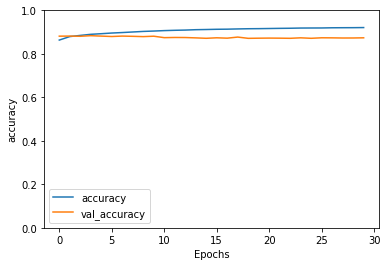

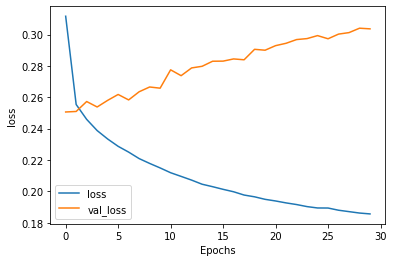

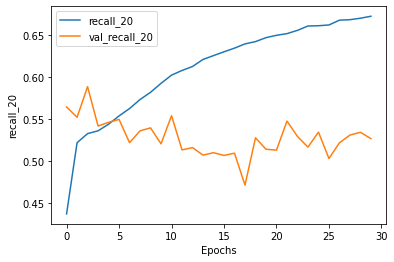

In [66]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_20")

<br><br>
##### Experiment 4: Weight-tied stacked LSTM

In [69]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='WeightTiedLSTM'):
    layer1 = layers.LSTM(25, dropout=0.2,recurrent_dropout=0.2,
                     input_shape=(None, 25), return_sequences=True)
    layer2 = TiedtLSTM(25, layer1, dropout=0.2,recurrent_dropout=0.2,
                        input_shape=(None, 25), return_sequences=True)

    model5 = Sequential()
    model5.add(layer1)
    model5.add(layer2)
    model5.add(layer2)
    model5.add(layers.Dense(1, activation='sigmoid'))
    display(model5.summary())

    model5.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    history = model5.fit(trainX, trainY,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=(valX, valY),
                        validation_steps=sv,
                        # class_weight=cw
    )
    # history = model.fit(train_gen,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=val_gen,
    #                     validation_steps=sv,
    #                     class_weight=cw
    #                     )
    mlflow.keras.log_model(model5, "WeightTiedLSTM", save_format='tf')
    mlflow.log_params(history.params)
    scores = model5.evaluate(testX, testY)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, None, 25)          5100      
_________________________________________________________________
tiedt_lstm_1 (TiedtLSTM)     (None, None, 25)          12725     
_________________________________________________________________
dense_21 (Dense)             (None, None, 1)           26        
Total params: 12,751
Trainable params: 10,251
Non-trainable params: 2,500
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 18s 91ms/step - loss: 0.6063 - accuracy: 0.8177 - recall_21: 0.0233 - val_loss: 0.3054 - val_accuracy: 0.8487 - val_recall_21: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 8s 83ms/step - loss: 0.3046 - accuracy: 0.8398 - recall_21: 0.0742 - val_loss: 0.2553 - val_accuracy: 0.8757 - val_recall_21: 0.6218
Epoch 3/10
100/100 [==============================] - 8s 80ms/step - loss: 0.2742 - accuracy: 0.8703 - recall_21: 0.5486 - val_loss: 0.2510 - val_accuracy: 0.8762 - val_recall_21: 0.5804
Epoch 4/10
100/100 [==============================] - 8s 79ms/step - loss: 0.2696 - accuracy: 0.8743 - recall_21: 0.5180 - val_loss: 0.2503 - val_accuracy: 0.8772 - val_recall_21: 0.5601
Epoch 5/10
100/100 [==============================] - 8s 79ms/step - loss: 0.2658 - accuracy: 0.8756 - recall_21: 0.5021 - val_loss: 0.2493 - val_accuracy: 0.8793 - val_recall_21: 0.5539
Epoch 6/10
100/100 [==============================] - 8s 80m

None

Epoch 1/20
300/300 [==============================] - 18s 32ms/step - loss: 0.4770 - accuracy: 0.8364 - recall_22: 0.1022 - val_loss: 0.2522 - val_accuracy: 0.8765 - val_recall_22: 0.5868
Epoch 2/20
300/300 [==============================] - 9s 29ms/step - loss: 0.2699 - accuracy: 0.8735 - recall_22: 0.5156 - val_loss: 0.2474 - val_accuracy: 0.8821 - val_recall_22: 0.5521
Epoch 3/20
300/300 [==============================] - 9s 29ms/step - loss: 0.2621 - accuracy: 0.8771 - recall_22: 0.4964 - val_loss: 0.2465 - val_accuracy: 0.8837 - val_recall_22: 0.5277
Epoch 4/20
300/300 [==============================] - 9s 29ms/step - loss: 0.2581 - accuracy: 0.8796 - recall_22: 0.5038 - val_loss: 0.2487 - val_accuracy: 0.8848 - val_recall_22: 0.5477
Epoch 5/20
300/300 [==============================] - 9s 28ms/step - loss: 0.2545 - accuracy: 0.8810 - recall_22: 0.5141 - val_loss: 0.2507 - val_accuracy: 0.8824 - val_recall_22: 0.4921
Epoch 6/20
300/300 [==============================] - 8s 28ms/st

None

Epoch 1/30
500/500 [==============================] - 21s 23ms/step - loss: 0.4238 - accuracy: 0.8398 - recall_23: 0.1516 - val_loss: 0.2522 - val_accuracy: 0.8754 - val_recall_23: 0.5627
Epoch 2/30
500/500 [==============================] - 10s 20ms/step - loss: 0.2665 - accuracy: 0.8754 - recall_23: 0.5076 - val_loss: 0.2532 - val_accuracy: 0.8781 - val_recall_23: 0.5560
Epoch 3/30
500/500 [==============================] - 10s 20ms/step - loss: 0.2603 - accuracy: 0.8769 - recall_23: 0.4926 - val_loss: 0.2519 - val_accuracy: 0.8806 - val_recall_23: 0.4908
Epoch 4/30
500/500 [==============================] - 10s 20ms/step - loss: 0.2562 - accuracy: 0.8796 - recall_23: 0.4942 - val_loss: 0.2540 - val_accuracy: 0.8815 - val_recall_23: 0.5277
Epoch 5/30
500/500 [==============================] - 10s 20ms/step - loss: 0.2526 - accuracy: 0.8819 - recall_23: 0.5047 - val_loss: 0.2533 - val_accuracy: 0.8823 - val_recall_23: 0.5178
Epoch 6/30
500/500 [==============================] - 10s 20

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall appears to be oscillating around 0.53 (range of 0.50-0.55).

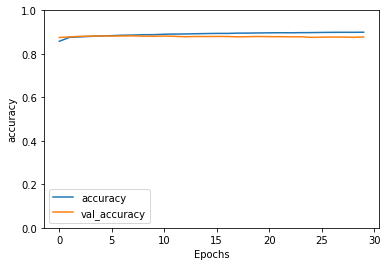

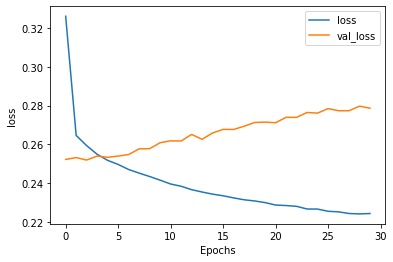

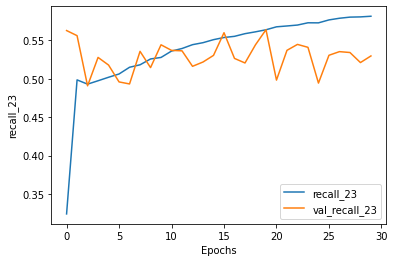

In [70]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_23")

<br><Br>
##### Experiment 5: Stacked LSTM with embedding

In [72]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='WeightTied+StackedLSTM'):
    layer1 = layers.Dense(25, activation='relu', input_shape=(None, 25))
    layer2 = TiedtDense(25, layer1, activation='relu')

    model6 = Sequential()
    model6.add(layer1)
    model6.add(layers.LSTM(25, dropout=0.2,recurrent_dropout=0.2,
                          input_shape=(None, 25), return_sequences=True))
    model6.add(layers.LSTM(25, dropout=0.2,recurrent_dropout=0.2,
                        input_shape=(None, 25)))
    model6.add(layer2)
    model6.add(layers.Dense(1, activation='sigmoid'))

    display(model6.summary())

    model6.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                   metrics=['accuracy', tf.keras.metrics.Recall()])
    history = model6.fit(trainX, trainY,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=(valX, valY),
                        validation_steps=sv,
                        # class_weight=cw
    )
    # history = model6.fit(train_gen,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=val_gen,
    #                     validation_steps=sv,
    #                     class_weight=cw
    #                     )
    mlflow.keras.log_model(model6, "WeightTied+StackedLSTM", save_format='tf')
    mlflow.log_params(history.params)
    scores = model6.evaluate(testX, testY)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, None, 25)          650       
_________________________________________________________________
lstm_27 (LSTM)               (None, None, 25)          5100      
_________________________________________________________________
lstm_28 (LSTM)               (None, 25)                5100      
_________________________________________________________________
tiedt_dense_6 (TiedtDense)   (None, 25)                1300      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 26        
Total params: 11,526
Trainable params: 10,901
Non-trainable params: 625
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 14s 71ms/step - loss: 0.5244 - accuracy: 0.8319 - recall_25: 0.1086 - val_loss: 0.2619 - val_accuracy: 0.8747 - val_recall_25: 0.6044
Epoch 2/10
100/100 [==============================] - 6s 63ms/step - loss: 0.2763 - accuracy: 0.8714 - recall_25: 0.5561 - val_loss: 0.2503 - val_accuracy: 0.8760 - val_recall_25: 0.5508
Epoch 3/10
100/100 [==============================] - 6s 62ms/step - loss: 0.2668 - accuracy: 0.8745 - recall_25: 0.5035 - val_loss: 0.2487 - val_accuracy: 0.8800 - val_recall_25: 0.5349
Epoch 4/10
100/100 [==============================] - 6s 63ms/step - loss: 0.2611 - accuracy: 0.8784 - recall_25: 0.4997 - val_loss: 0.2495 - val_accuracy: 0.8808 - val_recall_25: 0.5581
Epoch 5/10
100/100 [==============================] - 6s 64ms/step - loss: 0.2585 - accuracy: 0.8802 - recall_25: 0.5159 - val_loss: 0.2475 - val_accuracy: 0.8824 - val_recall_25: 0.5235
Epoch 6/10
100/100 [==============================] - 6s 64ms/st

None

Epoch 1/20
300/300 [==============================] - 14s 25ms/step - loss: 0.4089 - accuracy: 0.8450 - recall_26: 0.1892 - val_loss: 0.2493 - val_accuracy: 0.8820 - val_recall_26: 0.5431
Epoch 2/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2609 - accuracy: 0.8780 - recall_26: 0.4998 - val_loss: 0.2465 - val_accuracy: 0.8858 - val_recall_26: 0.5378
Epoch 3/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2526 - accuracy: 0.8823 - recall_26: 0.5133 - val_loss: 0.2496 - val_accuracy: 0.8849 - val_recall_26: 0.5373
Epoch 4/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2460 - accuracy: 0.8867 - recall_26: 0.5396 - val_loss: 0.2574 - val_accuracy: 0.8840 - val_recall_26: 0.4890
Epoch 5/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2411 - accuracy: 0.8906 - recall_26: 0.5565 - val_loss: 0.2581 - val_accuracy: 0.8830 - val_recall_26: 0.5245
Epoch 6/20
300/300 [==============================] - 7s 22ms/st

None

Epoch 1/30
500/500 [==============================] - 16s 17ms/step - loss: 0.4144 - accuracy: 0.8492 - recall_27: 0.3404 - val_loss: 0.2477 - val_accuracy: 0.8824 - val_recall_27: 0.4738
Epoch 2/30
500/500 [==============================] - 8s 16ms/step - loss: 0.2565 - accuracy: 0.8816 - recall_27: 0.4991 - val_loss: 0.2551 - val_accuracy: 0.8809 - val_recall_27: 0.5461
Epoch 3/30
500/500 [==============================] - 8s 16ms/step - loss: 0.2442 - accuracy: 0.8889 - recall_27: 0.5312 - val_loss: 0.2602 - val_accuracy: 0.8806 - val_recall_27: 0.4764
Epoch 4/30
500/500 [==============================] - 8s 16ms/step - loss: 0.2409 - accuracy: 0.8918 - recall_27: 0.5548 - val_loss: 0.2646 - val_accuracy: 0.8804 - val_recall_27: 0.4775
Epoch 5/30
500/500 [==============================] - 8s 16ms/step - loss: 0.2352 - accuracy: 0.8947 - recall_27: 0.5682 - val_loss: 0.2640 - val_accuracy: 0.8802 - val_recall_27: 0.4660
Epoch 6/30
500/500 [==============================] - 8s 16ms/st

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall is appears to be oscillating around 0.48.

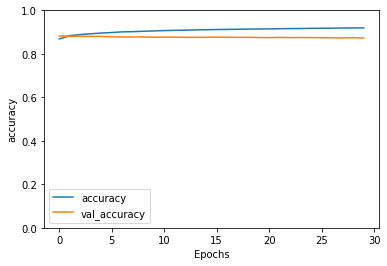

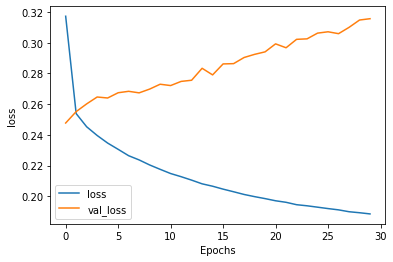

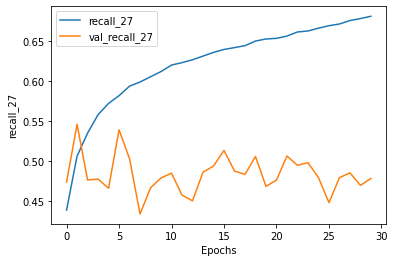

In [73]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_27")

<br><br>
##### Experiment 6: Weight-tied stacked LSTM with embedding

In [75]:
for s, e, sv, cw in zip(steps, epochs, steps_val, class_weight):
  with mlflow.start_run(run_name='WeightTied+StackedLSTM'):
    layer1 = layers.Dense(26, activation='relu', input_shape=(None, 26))
    layer2 = TiedtDense(26, layer1, activation='relu')
    layer3 = layers.LSTM(26, dropout=0.2,recurrent_dropout=0.2,
                     input_shape=(None, 26), return_sequences=True)
    layer4 = TiedtLSTM(26, layer3, dropout=0.2,recurrent_dropout=0.2,
                        input_shape=(None, 26), return_sequences=True)

    model7 = Sequential()
    model7.add(layer1)
    model7.add(layer3)
    model7.add(layer4)
    model7.add(layer2)
    model7.add(layers.Dense(1, activation='sigmoid'))

    display(model7.summary())

    model7.compile(optimizer=RMSprop(), loss='binary_crossentropy',
                   metrics=['accuracy', tf.keras.metrics.Recall()])
    # history = model7.fit(trainX, trainY,
    #                     steps_per_epoch=s,
    #                     epochs=e,
    #                     validation_data=(valX, valY),
    #                     validation_steps=sv,
    #                     # class_weight=cw
    # )
    history = model7.fit(train_gen,
                        steps_per_epoch=s,
                        epochs=e,
                        validation_data=val_gen,
                        validation_steps=sv,
                        class_weight=cw
                        )
    mlflow.keras.log_model(model7, "WeightTiedAll", save_format='tf')
    mlflow.log_params(history.params)
    scores = model7.evaluate(test_gen)
    mlflow.log_metrics({k: v for k, v in zip(
        ['loss', 'accuracy', 'recall'], scores)})

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, None, 25)          650       
_________________________________________________________________
lstm_33 (LSTM)               (None, None, 25)          5100      
_________________________________________________________________
tiedt_lstm_4 (TiedtLSTM)     (None, None, 25)          12725     
_________________________________________________________________
tiedt_dense_9 (TiedtDense)   (None, None, 25)          1300      
_________________________________________________________________
dense_33 (Dense)             (None, None, 1)           26        
Total params: 14,051
Trainable params: 10,926
Non-trainable params: 3,125
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 13s 70ms/step - loss: 0.5574 - accuracy: 0.8172 - recall_28: 0.0258 - val_loss: 0.2670 - val_accuracy: 0.8855 - val_recall_28: 0.4674
Epoch 2/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2816 - accuracy: 0.8694 - recall_28: 0.4986 - val_loss: 0.2512 - val_accuracy: 0.8833 - val_recall_28: 0.5976
Epoch 3/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2673 - accuracy: 0.8734 - recall_28: 0.5399 - val_loss: 0.2478 - val_accuracy: 0.8852 - val_recall_28: 0.5742
Epoch 4/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2609 - accuracy: 0.8765 - recall_28: 0.5198 - val_loss: 0.2457 - val_accuracy: 0.8862 - val_recall_28: 0.5312
Epoch 5/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2563 - accuracy: 0.8803 - recall_28: 0.5269 - val_loss: 0.2479 - val_accuracy: 0.8843 - val_recall_28: 0.5414
Epoch 6/10
100/100 [==============================] - 6s 61ms/st

None

Epoch 1/20
300/300 [==============================] - 14s 25ms/step - loss: 0.4052 - accuracy: 0.8474 - recall_29: 0.1494 - val_loss: 0.2533 - val_accuracy: 0.8773 - val_recall_29: 0.5679
Epoch 2/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2631 - accuracy: 0.8777 - recall_29: 0.5211 - val_loss: 0.2457 - val_accuracy: 0.8858 - val_recall_29: 0.5420
Epoch 3/20
300/300 [==============================] - 6s 22ms/step - loss: 0.2529 - accuracy: 0.8850 - recall_29: 0.5397 - val_loss: 0.2493 - val_accuracy: 0.8840 - val_recall_29: 0.5199
Epoch 4/20
300/300 [==============================] - 6s 22ms/step - loss: 0.2473 - accuracy: 0.8887 - recall_29: 0.5564 - val_loss: 0.2523 - val_accuracy: 0.8808 - val_recall_29: 0.4568
Epoch 5/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2441 - accuracy: 0.8894 - recall_29: 0.5573 - val_loss: 0.2542 - val_accuracy: 0.8812 - val_recall_29: 0.4607
Epoch 6/20
300/300 [==============================] - 7s 22ms/st

None

Epoch 1/30
500/500 [==============================] - 15s 17ms/step - loss: 0.3842 - accuracy: 0.8560 - recall_30: 0.3150 - val_loss: 0.2507 - val_accuracy: 0.8813 - val_recall_30: 0.5514
Epoch 2/30
500/500 [==============================] - 8s 16ms/step - loss: 0.2578 - accuracy: 0.8794 - recall_30: 0.5012 - val_loss: 0.2494 - val_accuracy: 0.8860 - val_recall_30: 0.5224
Epoch 3/30
500/500 [==============================] - 8s 15ms/step - loss: 0.2487 - accuracy: 0.8845 - recall_30: 0.5436 - val_loss: 0.2544 - val_accuracy: 0.8834 - val_recall_30: 0.5241
Epoch 4/30
500/500 [==============================] - 8s 15ms/step - loss: 0.2405 - accuracy: 0.8886 - recall_30: 0.5759 - val_loss: 0.2559 - val_accuracy: 0.8822 - val_recall_30: 0.4494
Epoch 5/30
500/500 [==============================] - 8s 15ms/step - loss: 0.2372 - accuracy: 0.8918 - recall_30: 0.5885 - val_loss: 0.2583 - val_accuracy: 0.8797 - val_recall_30: 0.5329
Epoch 6/30
500/500 [==============================] - 8s 16ms/st

<br>
Model accuracy for the displayed run has an accuracy for both training and validation between $85$% and $90$%.  Validation loss is increasing, and validation recall appears to be converging to 0.48.

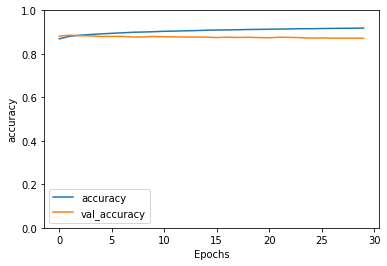

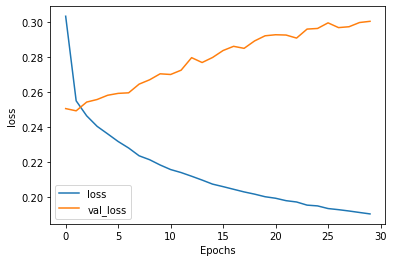

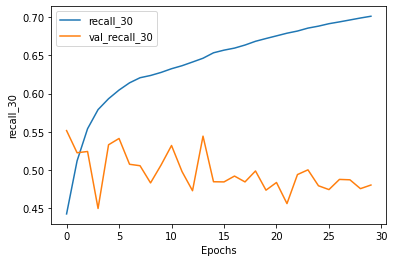

In [76]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "recall_30")

<Br><Br>
#### MLFlow Logging
To better keep track of each experiment's results we use the MLFlow library which provides a platform for managing the machine learning lifecycle.  From the dashboard we can easily see that--if test accuracy is our primary metric--experiment scenarios (4), (5) and (6) perform the best.

In [74]:
get_ipython().system_raw("mlflow ui --port 5000 &")

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

t=2021-01-15T15:52:40+0000 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


MLflow Tracking UI: https://be330106ff85.ngrok.io


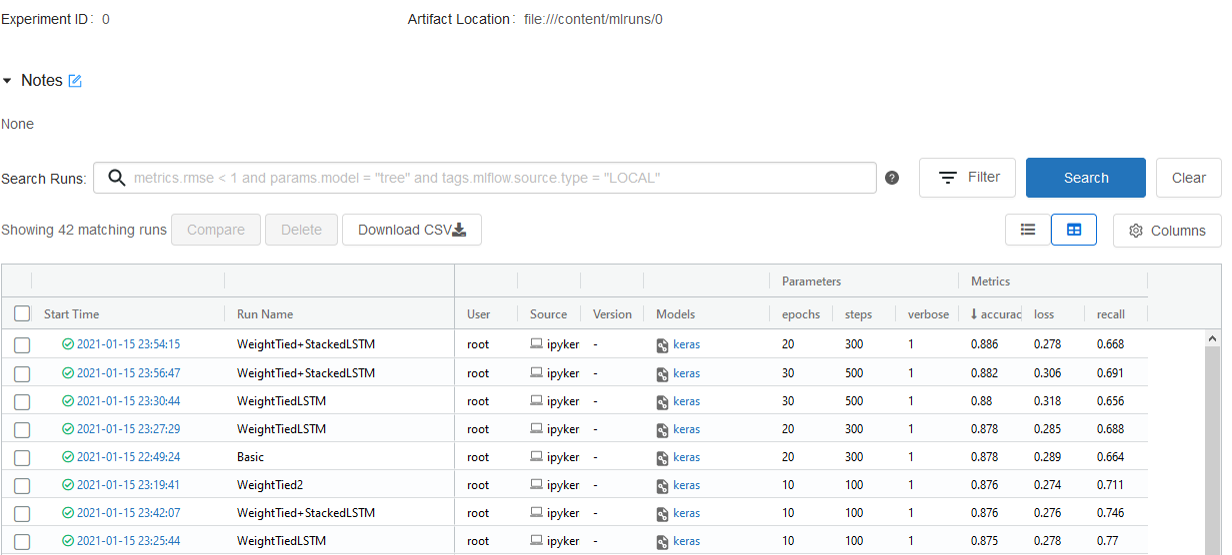

### Conclusion
While it appears that our models give decent results in terms of accuracy, it is not good enough to beat a baseline heuristic. Furthermore, when analysing our other metrics, we are suffering from some overfitting.  Still, over the course of the different experiments, adding embeddings (weight tying) has introduced some improvement.  The hypothesis could serve for further experiment with improved methodology.

#### Recommendation
As was mentioned in the methodology section, adding dropout layers, batch normalization, and other regularization should be explored to address the overfitting problem.  Also, other implementations of embedding (i.e. TrellisNet) is intended to be explored.  Another recommendation is to reframe the problem in terms of actually predicting CMEs rather than just solar flares. However, additional data would be needed for the flare classification.  Speaking of data, future work should remove the sampling to maximize the available data.

### References
Abdullah, Y., Wang, JTL., Nie, Y., Liu, C., Wang, H. (2020). DeepSun: Machine-Learning-as-a-Service for SolarFlare Prediction.

Kaggle (2019). BigData Cup Challenge 2019: Flare Prediction. Retrieved from https://www.kaggle.com/c/bigdata2019-flare-prediction/data

Kurzgesagt (2020). Could Solar Storms Destroy Civilization? Solar Flares & Coronal Mass Ejections. Retrieved from https://www.youtube.com/watch?v=oHHSSJDJ4oo

MLFlow. https://www.mlflow.org/docs/latest/index.html#

NASA. Sunspots and Solar Flares. Retrieved from https://spaceplace.nasa.gov/solar-activity/en/

Press, Ofir & Wolf, Lior. (2017). Using the Output Embedding to Improve Language Models. 157-163. 10.18653/v1/E17-2025. 

Wang, Xiantong & Chen, Yang & Toth, Gabor & Manchester, Ward & Gombosi, T. & Hero, Alfred & Jiao, Zhenbang & Sun, Hu & Jin, Meng & Liu, Yang. (2019). Predicting solar flares with machine learning: investigating solar cycle dependence. 

World Science Festival (2014). What’s The Real Danger From Solar Flares? Retrieved from https://www.worldsciencefestival.com/2014/10/whats-real-danger-solar-flares/ 